In [1]:
# Import packages
from tensorflow.python.keras import layers
import numpy as np
from tensorflow.python.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from PIL import Image
import os.path
import glob
import os
import cv2
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)

2022-04-30 00:01:30.745742: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-04-30 00:01:33.445487: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-30 00:01:33.454575: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-04-30 00:01:33.900466: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:57:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2022-04-30 00:01:33.901245: I tensorflow/core/common_runtime/gpu/gpu_devi

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:57:00.0, compute capability: 8.6
/job:localhost/replica:0/task:0/device:GPU:1 -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:ce:00.0, compute capability: 8.6



2022-04-30 00:01:34.950607: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-04-30 00:01:34.950653: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 1 
2022-04-30 00:01:34.950663: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N N 
2022-04-30 00:01:34.950669: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 1:   N N 
2022-04-30 00:01:34.956237: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1418] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 22308 MB memory) -> physical GPU (device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:57:00.0, compute capability: 8.6)
2022-04-30 00:01:34.985306: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1418] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 22308 MB memory) -> physical GPU (device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:ce:00.0, compute capab

In [83]:
def convertjpg(jpgfile,outdir,width=64,height=64):
    img=Image.open(jpgfile)   
    new_img=img.resize((width,height),Image.BILINEAR)   
    new_img.save(os.path.join(outdir,os.path.basename(jpgfile)))
for jpgfile in glob.glob('/root/autodl-tmp/thispersondoesnotexist.10k/*.jpg'):
    convertjpg(jpgfile,'/root/autodl-tmp/thispersondoesnotexist.10k')
for jpgfile in glob.glob('/root/autodl-tmp/0/*.jpg'):
    convertjpg(jpgfile,'/root/autodl-tmp/0')

In [2]:
def getFileName(filepath):
    path_list = []
    pathList = os.listdir(filepath)
    for allFile in pathList:
        everyFile = os.path.join(filepath, allFile)
        path_list.append(everyFile)
    return path_list
training_path = getFileName('/root/autodl-tmp/thispersondoesnotexist.10k')
testing_path = getFileName('/root/autodl-tmp/0')

In [3]:
training_path = training_path[:10000]

In [4]:
print(len(training_path))
print(len(testing_path))

10000
10000


In [5]:
testing_img_path = training_path[:800] + testing_path[:200]
training_img_path = training_path[800:]

In [6]:
test_y = 800*[0] + 200*[1]
test_y = np.array(test_y)

In [7]:
train = np.array([cv2.imdecode(np.fromfile(path,dtype=np.uint8),-1)/ 255. for path in training_img_path])
train = train.reshape(9200,64,64,3)
print(train.shape)
test = np.array([cv2.imdecode(np.fromfile(path,dtype=np.uint8),-1)/ 255. for path in testing_img_path])
test = test.reshape(1000,64,64,3)
print(test.shape)

(9200, 64, 64, 3)
(1000, 64, 64, 3)


In [8]:
import tensorflow.python.keras as keras
from tensorflow.python.keras import layers

input_img = keras.Input(shape=(64, 64, 3))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
conv_shape = tf.shape(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dense(8, activation='relu')(x)
encoded = layers.Dense(4, activation='relu')(x)
x = layers.Dense(4, activation='relu')(encoded)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = tf.reshape(x, conv_shape)
x = layers.Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x) 
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 32, 32, 16)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 8)    1160        max_pooling2d[0][0]              
______________________________________________________________________________________________

2022-04-30 00:01:45.378987: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:57:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2022-04-30 00:01:45.379800: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:ce:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2022-04-30 00:01:45.383983: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0, 1
2022-04-30 00:01:45.385239: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:57:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2022-04-30 0

In [9]:
from tensorflow.python.keras.callbacks import TensorBoard

autoencoder.fit(train, train,
                epochs=1000,
                batch_size=128,
                shuffle=True,
                validation_data=(train, train),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

2022-04-30 00:01:46.796106: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-04-30 00:01:46.796153: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-04-30 00:01:46.796258: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1611] Profiler found 2 GPUs
2022-04-30 00:01:46.798540: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcupti.so.11.2
2022-04-30 00:01:47.028823: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-04-30 00:01:47.035751: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1743] CUPTI activity buffer flushed
2022-04-30 00:01:48.702866: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-30 00:01:48.707905: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2000000000 Hz


Epoch 1/1000


2022-04-30 00:01:50.045529: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-04-30 00:01:51.120363: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8101
2022-04-30 00:01:52.246573: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-04-30 00:01:53.044977: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-04-30 00:01:53.069488: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


 1/72 [..............................] - ETA: 5:41 - loss: 0.6931

2022-04-30 00:01:53.578744: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-04-30 00:01:53.578785: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.


 3/72 [>.............................] - ETA: 38s - loss: 0.6929 

2022-04-30 00:01:54.508092: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-04-30 00:01:54.515641: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1743] CUPTI activity buffer flushed
2022-04-30 00:01:54.596264: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 317 callback api events and 315 activity events. 
2022-04-30 00:01:54.607430: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-04-30 00:01:54.618235: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/autoencoder/train/plugins/profile/2022_04_30_00_01_54
2022-04-30 00:01:54.629353: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /tmp/autoencoder/train/plugins/profile/2022_04_30_00_01_54/container-205611993c-92cd3b5f.trace.json.gz
2022-04-30 00:01:54.648894: I tensorflow/core/profiler/rpc/client/save_profile.cc:

72/72 [==============================] - 9s 53ms/step - loss: 0.6766 - val_loss: 0.6602
Epoch 2/1000
72/72 [==============================] - 2s 22ms/step - loss: 0.6512 - val_loss: 0.6475
Epoch 3/1000
72/72 [==============================] - 1s 20ms/step - loss: 0.6454 - val_loss: 0.6434
Epoch 4/1000
72/72 [==============================] - 1s 20ms/step - loss: 0.6426 - val_loss: 0.6413
Epoch 5/1000
72/72 [==============================] - 2s 22ms/step - loss: 0.6408 - val_loss: 0.6407
Epoch 6/1000
72/72 [==============================] - 1s 21ms/step - loss: 0.6401 - val_loss: 0.6397
Epoch 7/1000
72/72 [==============================] - 2s 24ms/step - loss: 0.6395 - val_loss: 0.6394
Epoch 8/1000
72/72 [==============================] - 1s 20ms/step - loss: 0.6392 - val_loss: 0.6390
Epoch 9/1000
72/72 [==============================] - 2s 22ms/step - loss: 0.6390 - val_loss: 0.6386
Epoch 10/1000
72/72 [==============================] - 2s 23ms/step - loss: 0.6388 - val_loss: 0.6388
Ep

In [10]:
autoencoder.save("autoencoder_cartoon_fc")
autoencoder.save_weights("autoencoder_cartoon_fc_weights.h5")

2022-04-30 00:36:00.949234: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: autoencoder_cartoon_fc/assets


In [14]:
from tensorflow import keras
autoencoder = keras.models.load_model('autoencoder_cartoon')
autoencoder.load_weights("autoencoder_cartoon_weights.h5")

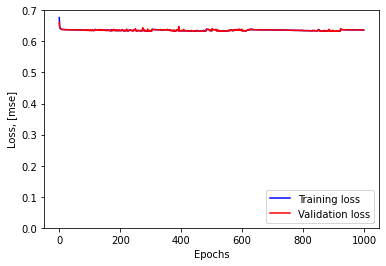

In [11]:
def plot_AE_history(history):
    plt.plot(history.history.history['loss'],
             'b',
             label='Training loss')
    plt.plot(history.history.history['val_loss'],
             'r',
             label='Validation loss')
    plt.legend(loc='lower right')
    plt.xlabel('Epochs')
    plt.ylabel('Loss, [mse]')
    plt.ylim([0,0.7])
    plt.show()

plot_AE_history(autoencoder)

In [12]:
X_pred = autoencoder.predict(train)

In [13]:
normal_max = 0
loss_list = []
for i in range(train.shape[0]):
    normal_loss = X_pred[i]
    loss = np.mean((normal_loss-train[i])**2)
    normal_max = max(normal_max, loss)
    loss_list.append(loss)

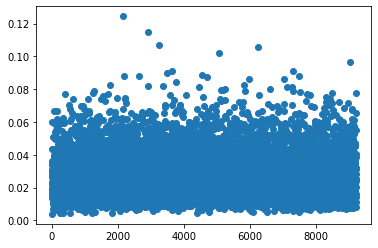

In [14]:
a = np.linspace(0, 9200, 9200)
plt.scatter(a, np.array(loss_list))

In [15]:
X_test_pred = autoencoder.predict(test)

In [16]:
threshold = np.linspace(0, 1, 5000)

In [17]:
losses = []
for i in range(test.shape[0]):
    x_decoded = X_test_pred[i]
    loss = np.mean((x_decoded-test[i])**2)
    losses.append(loss)

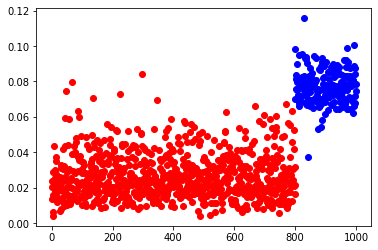

In [18]:
a = np.linspace(0, 800, 800)
plt.scatter(a, np.array(losses[0:800]), color = 'red')
b = np.linspace(800, 1000, 200)
plt.scatter(b, np.array(losses[800:]), color = 'blue')  

In [21]:
from sklearn.metrics import accuracy_score,f1_score
acc_list = []
f1_list = []
for t in threshold:    
    y_pred = (losses>t).astype(np.int64)
    acc_list.append(accuracy_score(y_pred,test_y))
    f1_list.append(f1_score(y_pred,test_y))

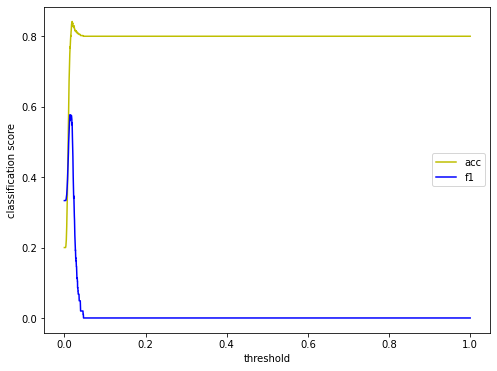

In [37]:
plt.figure(figsize=(8,6))
plt.plot(threshold,acc_list,c = 'y',label = 'acc')
plt.plot(threshold,f1_list,c = 'b',label = 'f1')
plt.xlabel('threshold')
plt.ylabel('classification score')
plt.legend()

In [22]:
i = np.argmax(f1_list)
t = threshold[i]
score = f1_list[i]
print('Recommended threshold: %.3f, related f1 score: %.3f'%(t,score))

y_pred = (losses>t).astype(np.int64)
y_pred = y_pred.reshape(1000,1)
test_y = test_y.reshape(1000,1)
TP = ((test_y==1) & (y_pred==1)).sum()
FN = ((test_y==1) & (y_pred==0)).sum()
FP = ((test_y==0) & (y_pred==1)).sum()
TN = ((test_y==0) & (y_pred==0)).sum()
print('In %d data of test set, TP: %d, FN: %d, FP: %d, TN: %d'%(len(test_y),TP,FN,FP,TN))

Recommended threshold: 0.063, related f1 score: 0.965
In 1000 data of test set, TP: 194, FN: 6, FP: 8, TN: 792


In [23]:
TP/(TP+FN)

0.97

In [24]:
i = np.argmax(acc_list)
t = threshold[i]
score = acc_list[i]
print('Recommended threshold: %.3f, related acc score: %.3f'%(t,score))

y_pred = (losses>t).astype(np.int64)
y_pred = y_pred.reshape(1000,1)
test_y = test_y.reshape(1000,1)
TP = ((test_y==1) & (y_pred==1)).sum()
FN = ((test_y==1) & (y_pred==0)).sum()
FP = ((test_y==0) & (y_pred==1)).sum()
TN = ((test_y==0) & (y_pred==0)).sum()
print('In %d data of test set, TP: %d, FN: %d, FP: %d, TN: %d'%(len(test_y),TP,FN,FP,TN))

Recommended threshold: 0.063, related acc score: 0.986
In 1000 data of test set, TP: 194, FN: 6, FP: 8, TN: 792


In [25]:
TP/(TP+FN)

0.97